## Answer to mandatory exercise 3: Ant Colony Optimization by Abdullah Karagøz
### in AI Methods and Applications (DTE-2501)
First we implement the algorithm with 3 functions, then we prepare the data and run the algorithm, and then we show the results and compare results with Dijktra's algorithm



In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from random import choices

#### Implementing the Ant Colony Optimization algorithm with 3 functions. Last function uses the first 2 functions.

In [2]:
# Ant function
def ant(node, goal, pher_g):
    path, nset = [] , set() # nset is the visited nodes set
    cost = 0
    
    while True:
        # If goal is found, quit
        if node == goal:
            return path + [node]

        # Get the neighbor nodes with their weights
        nodes, weights = zip(*[(k,v) for k,v in pher_g[node].items()])
    
        # Choose randomly based on their weights
        ch = choices(nodes, weights)[0]
        
        # If node not visited before
        if ch not in nset:
            path.append(node)
            nset.add(node)
            node = ch
        else:
            return None

In [3]:
# Update pheromones
def update_pheromones(ant_paths, pher_g, cost_graph):
    path_cost = 0

    pher_n = 1


    for ap in ant_paths:
        path_cost = 0
        # Adding all cost of path of the ant
        for i in range(len(ap) - 1):
            path_cost += cost_graph[ap[i]][ap[i+1]]

        # The amount of pheromone on that path, higher cost, less pher to deposit
        pher_to_desposit = pher_n / path_cost

        # Add the pher into the pher_graph
        for i in range(len(ap) - 1):
            pher_g[ap[i]][ap[i+1]] += pher_to_desposit
    
    return pher_g

In [4]:
# Get the path (main function using the two functions above)
def get_path(start, goal, graph, nr_of_ants):
    # Build pheromone graph with equal pheromones everywhere
    pher_g = {k: {e: 1.0 for e,w in v.items()} for k,v in graph.items()}
    
    # Make the ants travel
    ant_paths = [ant('0', '29', pher_g) for i in range(nr_of_ants)]
    
    # Update pheromones
    pher_g = update_pheromones(ant_paths, pher_g, graph)
    
    # Code to build path
    path = list()
    path.append(start)

    current = start
    while current != goal:
        next_node = max(pher_g[current], key=pher_g[current].get)
        path.append(next_node)
        current = next_node
    
    # Return path and updated pheromone graph
    return path, pher_g

#### Loading and preparing data, running the algorithm

In [5]:
# Loading JSON data
filename = 'graph.json'

with open(filename, 'r') as fl:
    graph = json.load(fl)

In [6]:
# PREPARE DATA - Get rid of the unnecessary inner dicts
graph_simple = {k: {e: w['weight'] for e,w in v.items()} for k,v in graph.items()}

In [7]:
# Run athe algorithm and return the path, here using 20,000 ants
path, pher_g = get_path('0', '29', graph_simple, 20000)

#### Showing results and comparing with Dijktra's Algorithm

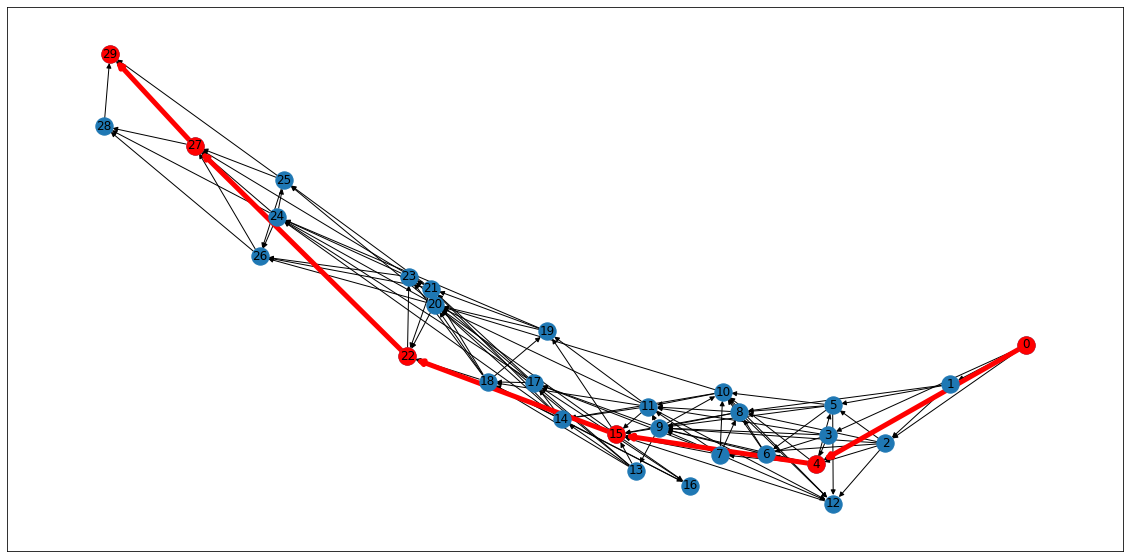

In [8]:
# Visualize the path
# Change the figure size
plt.rcParams["figure.figsize"] = (20,10)

#nx.draw(nxg)

# Get the graph into networkx.classes.digraph.DiGraph object
nxg = nx.from_dict_of_dicts(graph, create_using=nx.DiGraph)


# Get position numbers
positions = nx.spring_layout(nxg, k=0.1, iterations=100)


# Draw network with position numbers
path_edges = set(zip(path,path[1:]))

nx.draw_networkx(nxg, positions)
nx.draw_networkx_nodes(nxg,positions,nodelist=path,node_color='r')
nx.draw_networkx_edges(nxg,positions,edgelist=path_edges,edge_color='r',width=5)

In [9]:
# Compare results with the shortest path found with Dijktra's algorithm
dijk_p = nx.dijkstra_path(nxg, '0', '29', weight='weight')

print("Shortest path by Ant colonization algorithm: ", path)
print("Shortest path by Dijktra's algorithm: ", dijk_p)

Shortest path by Ant colonization algorithm:  ['0', '4', '15', '22', '27', '29']
Shortest path by Dijktra's algorithm:  ['0', '4', '15', '22', '27', '29']
